# Explore here

In [ ]:
#Los IMPORTS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#Importar data y convertirla a CSV
url = "https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv"
pd.read_csv(url, sep= ";", encoding= "utf-8", quotechar='"').to_csv("../data/raw/bank-marketing-campaign-data.csv", index=False)


In [ ]:
#Cargar el dataset
df = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv")

In [ ]:
#Mostrar las primeras 5 lineas del DataFrame
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#Resumen completo del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

En la distribución que se ofrece el dataset, hay 10 categorias que son númericas (int64 y float64) y 11 que son del tipo "object"

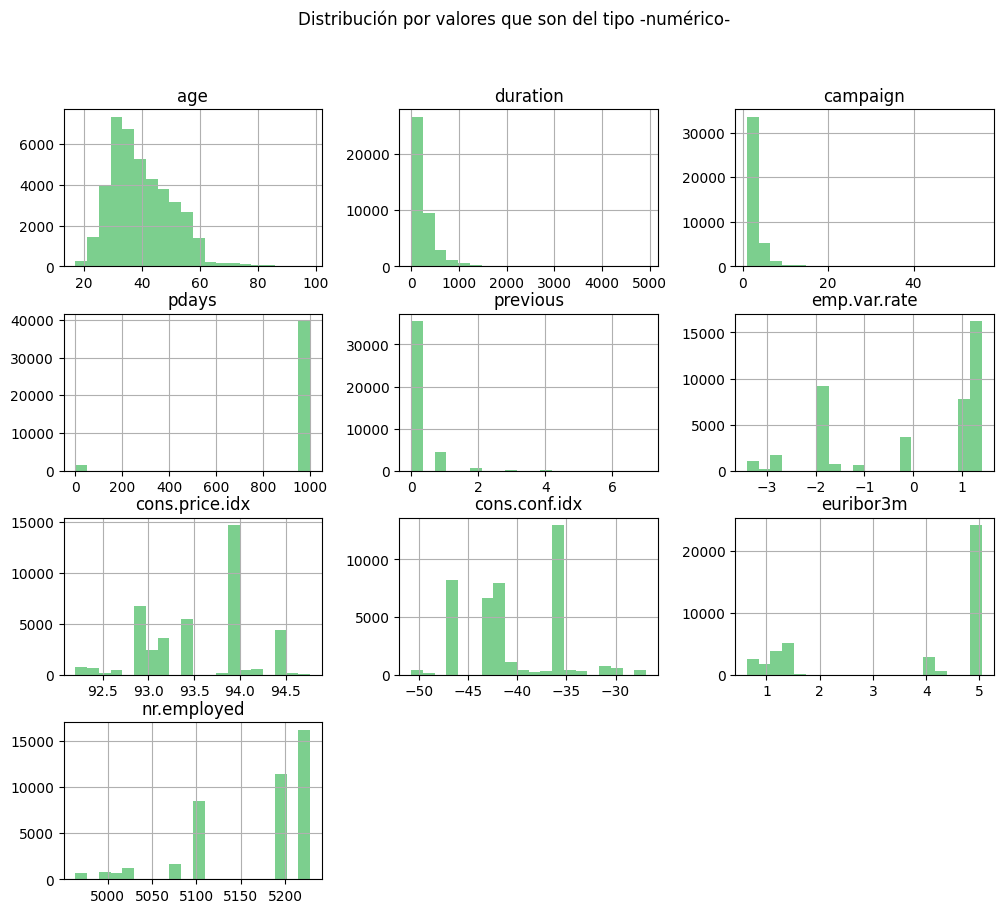

In [45]:
#Separar los valores que son del tipo -numérico- para visualizar su distribución
num_cols = df.select_dtypes(include="number").columns
df[num_cols].hist(bins=20, figsize=(12, 10), color="#7CCF8E")
plt.suptitle("Distribución por valores que son del tipo -numérico-")
plt.show()

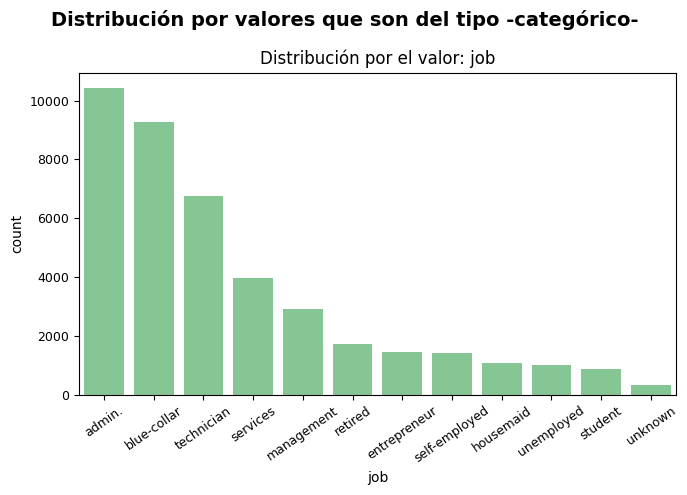

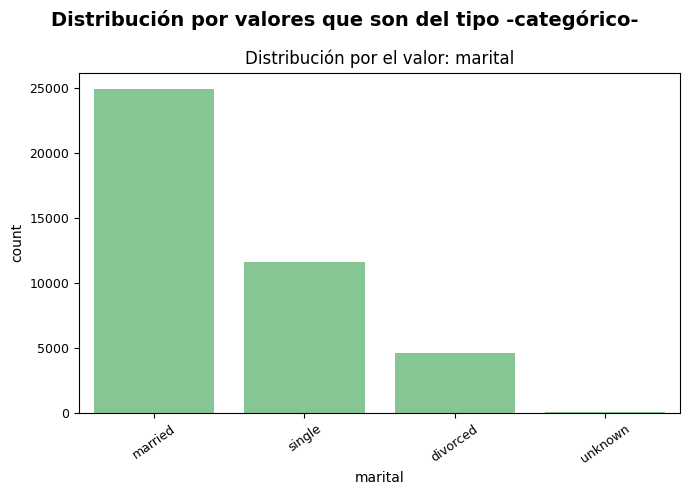

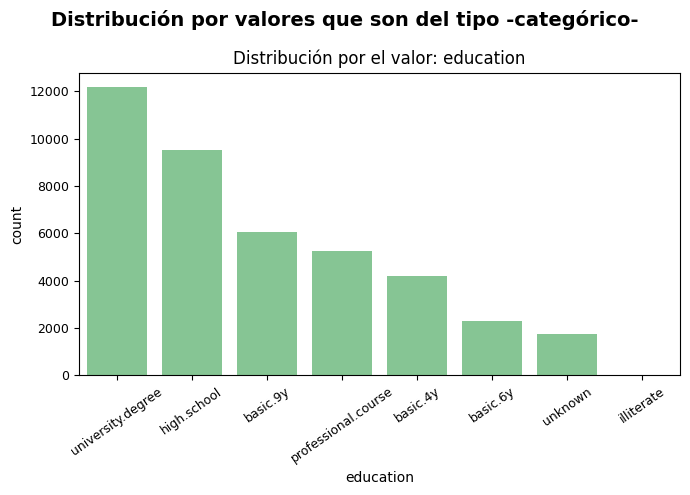

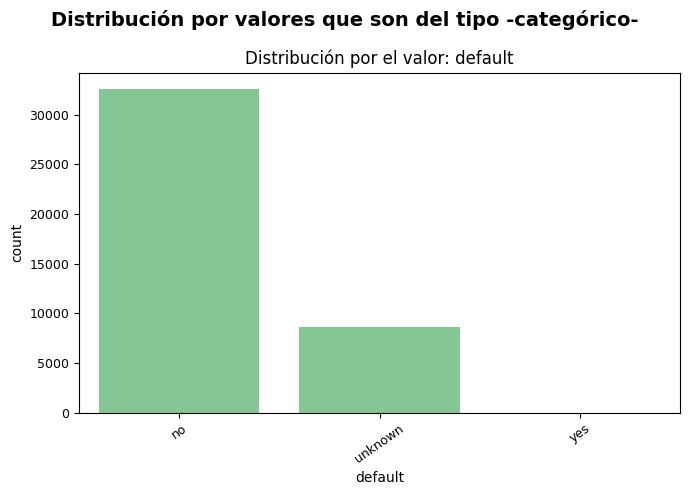

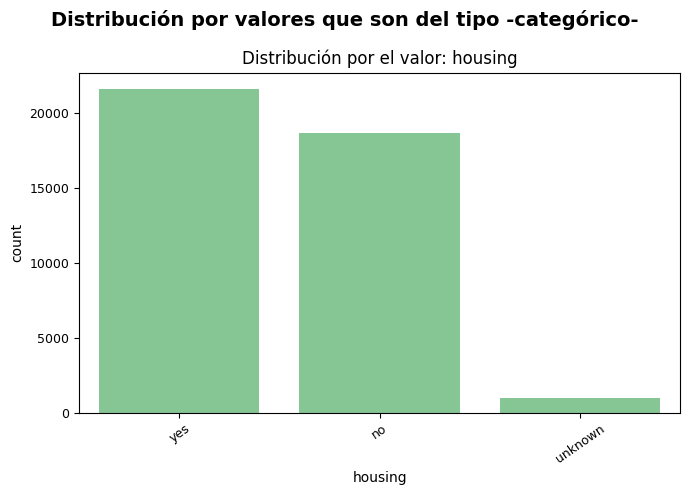

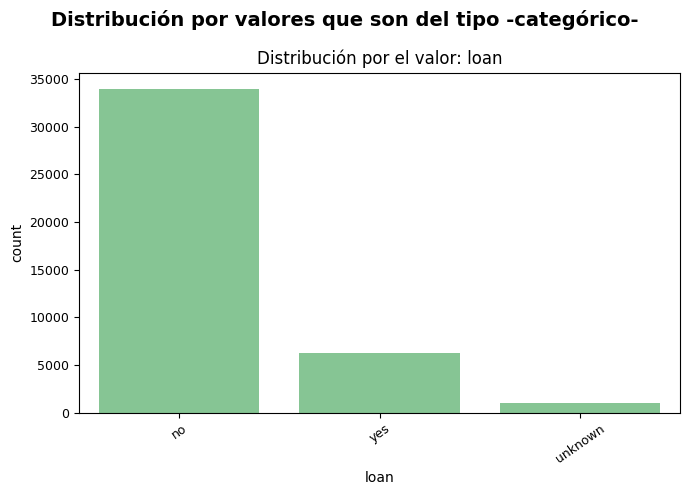

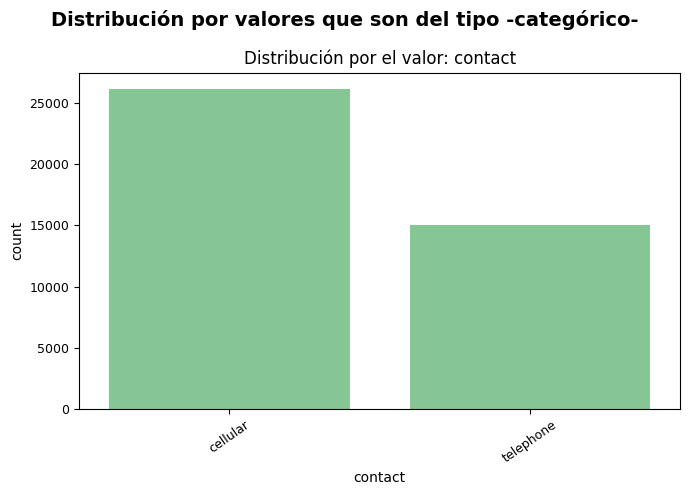

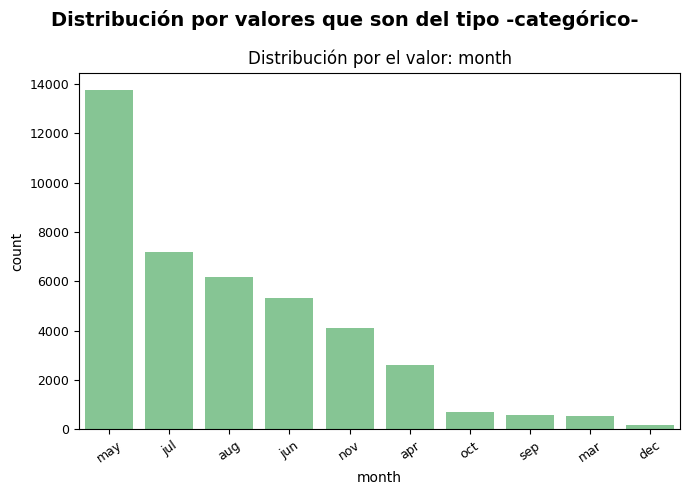

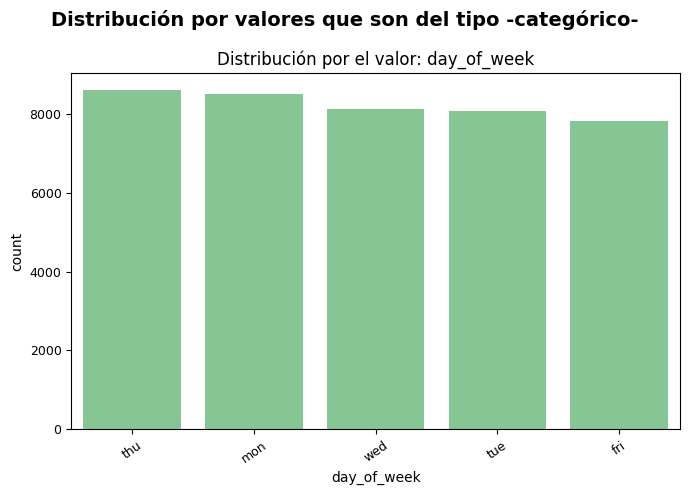

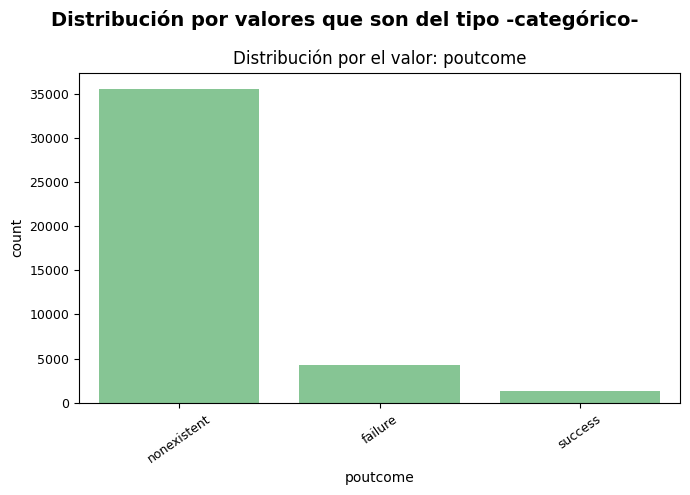

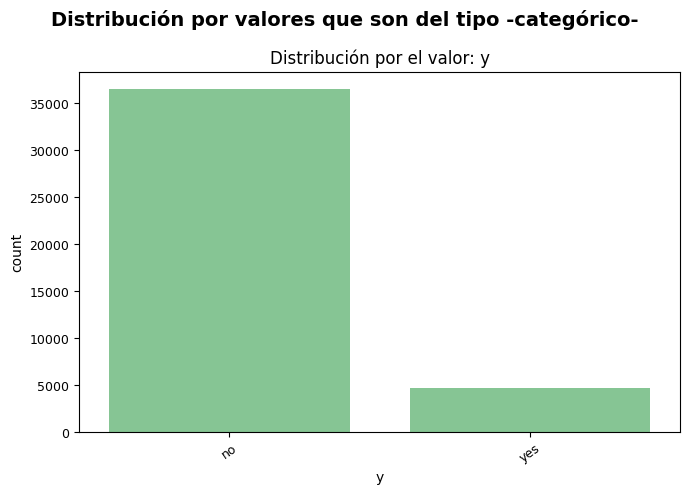

In [44]:

#Separar los valores que son del tipo -categórico- para visualizar su distribución
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, color="#7CCF8E")
    plt.suptitle("Distribución por valores que son del tipo -categórico-", fontsize=14, fontweight="bold")
    plt.title(f"Distribución por el valor: {col}", fontsize=12)
    plt.xticks(rotation=35, fontsize=9)
    plt.yticks(fontsize=9)
    plt.tight_layout()
    plt.show()